<div class="alert alert-block alert-success">
<center><b> CASE STUDY  </center></b>
</div>

# Variable creation 

In [1]:
# importng the libraries
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.stats import bernoulli, gamma, uniform

from sklearn.ensemble import RandomForestClassifier 

import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm , metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score , confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

### Variable: Sex

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Bernoulli Distribution')]

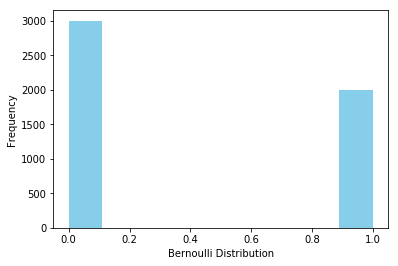

In [2]:
# Sex Bernoulli(p = 0.4)

sex = bernoulli.rvs(size = 5000,p = 0.4, random_state = 123)

#plot the variable
ax= sns.distplot(sex,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

In [3]:
# Above we got a distribution of zeros and ones. We can see that the number of zeros is a bit less than 3000, whereas the number of ones is a bit higher than 2000
# However let's see the exact number
print("Number of ones in variable sex is: " + str(np.count_nonzero(sex)))

Number of ones in variable sex is: 2000


### Variable: Age

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Gamma Distribution')]

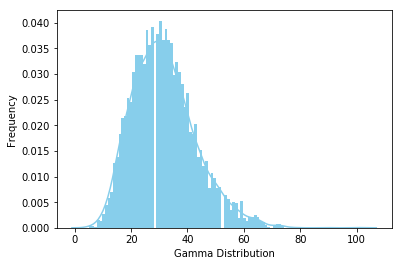

In [4]:
# we will set a varibale Age to be an integer type
age = gamma.rvs( a = 8, scale = 4, size=5000 , random_state = 123).astype(int)


ax = sns.distplot(age,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Variable: Purchase

In [5]:
purchase = uniform.rvs(size = 5000, loc = 500, scale = 550 , random_state = 123) - 10 * age * uniform.rvs(size = 5000, loc = -2, scale = 0.01, random_state = 123)

In [8]:
#purchase = [ "{:0.2f}".format(x) for x in purchase ]

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Purchase Distribution ')]

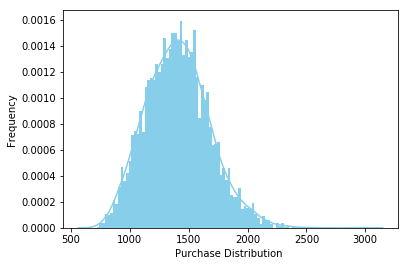

In [6]:
ax = sns.distplot(purchase,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Purchase Distribution ', ylabel='Frequency')

In [7]:
# p of the Bernoulli distribution for the output variable
a = 0.3 * sex + list(map(lambda x: 0.2 if x > 30 else 0.4,age)) + list(map(lambda x: 0.3 if x > 100 else 0,purchase))

In [8]:
output = bernoulli.rvs(size = 5000, p = a , random_state = 123)

In [9]:
output.sum()  
#- unbalanced ds ? not really 
#see after dividing it !

3238

### Create a dataset

In [10]:
dataset = pd.DataFrame(data = np.matrix([sex, age, purchase, output]).T, columns= [ "sex", "age", "purchase", "output" ])

In [11]:
dataset.head()

,sex,age,purchase,output
0,1.0,20.0,1281.665114,1.0
1,0.0,43.0,1516.146235,0.0
2,0.0,24.0,1104.223856,1.0
3,0.0,52.0,1840.356286,1.0
4,1.0,10.0,1094.988464,1.0


 <div class="alert alert-block alert-warning"><center><b> EXPLORATORY ANALYSIS </b></center> </div> 

In [12]:
# there is no missing values 
dataset.isnull().sum()

sex         0
age         0
purchase    0
output      0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
sex         5000 non-null float64
age         5000 non-null float64
purchase    5000 non-null float64
output      5000 non-null float64
dtypes: float64(4)
memory usage: 156.3 KB


In [14]:
# check if there are any duplicates 
dataset_no_dup = dataset.drop_duplicates()
dataset_no_dup.shape 

(5000, 4)

In [15]:
dataset.describe()

,sex,age,purchase,output
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.400000,31.741400,1406.863754,0.647600
std,0.489947,11.272264,271.326027,0.477766
min,0.000000,5.000000,716.807627,0.000000
25%,0.000000,24.000000,1213.594053,0.000000
50%,0.000000,31.000000,1398.629448,1.000000
75%,1.000000,38.000000,1577.862401,1.000000
max,1.000000,101.000000,2990.752453,1.000000


## Detecting outliers

In [16]:
# Custom function for detecting outliers
def catch_outliers(column):
    
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1 
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    for element in column:
        out = [element for element in column if element>upper_limit or element<lower_limit]
            
    return out

Number of outliers in column Age is: 88
Percentage of outliers in column Age is: 1.76 %


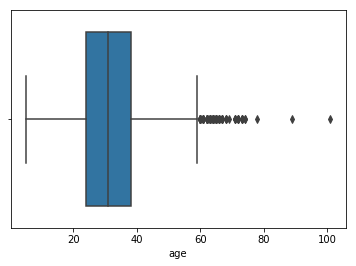

In [17]:
# Outliers can be identified also by using a box plot
print("Number of outliers in column Age is: " + str(len(catch_outliers(dataset.age))))
print("Percentage of outliers in column Age is: " + str((len(catch_outliers(dataset.age))/5000 )*100) + " %")
sns.boxplot(x = dataset.age)

Number of outliers in column Purchase is: 45
Percentage of outliers in column Purchase is: 0.8999999999999999 %


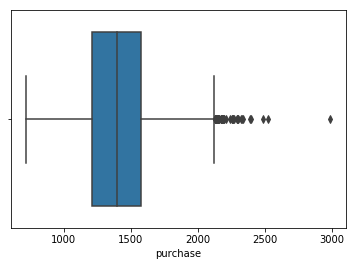

In [18]:
print("Number of outliers in column Purchase is: " + str(len(catch_outliers(dataset.purchase))))
print("Percentage of outliers in column Purchase is: " + str((len(catch_outliers(dataset.purchase))/5000 )*100) + " %")
sns.boxplot(x = dataset.purchase)

In [19]:
dataset.groupby('sex')['purchase'].mean()

sex
0.0    1303.294694
1.0    1562.217344
Name: purchase, dtype: float64

In [20]:
dataset.groupby('sex')['age'].mean()

sex
0.0    32.0520
1.0    31.2755
Name: age, dtype: float64

## Class Imbalance

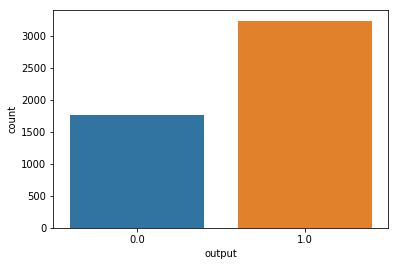

In [21]:
sns.countplot(dataset['output'], label = "Count")

## Correlation 

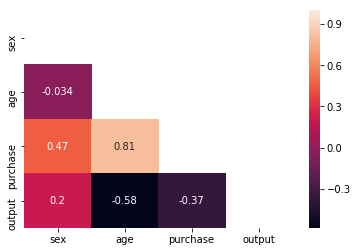

In [26]:
# Correlation between the features 
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, mask=matrix)

In [27]:
X = dataset[["age" ,"purchase","sex"]]  #independent columns
y = dataset["output"] # dependent column 

[0.5542623  0.36115551 0.08458219]


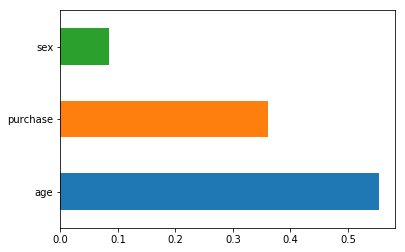

In [28]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

 <div class="alert alert-block alert-warning"><center><b> MODEL IMPLEMENTATION </b></center> </div> 

## Scaled Dataset

In [29]:
SC = StandardScaler()
dataset_scaled = pd.DataFrame(data = SC.fit_transform(dataset[["age" ,"purchase","sex"]] ), columns = ["age" ,"purchase","sex"])   

In [30]:
dataset_scaled.head()

,age,purchase,sex
0,-1.041723,-0.461479,1.224745
1,0.998888,0.402812,-0.816497
2,-0.686834,-1.115522,-0.816497
3,1.797387,1.597841,-0.816497
4,-1.928945,-1.149563,1.224745


## Divide the dataset into a training and test set

In [31]:
# Dividing the data into a train and test sets in  way 75% - 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic regresion

In [32]:
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['age', 'purchase', 'sex']


Optimal number of features: 3
Selected features: ['age', 'purchase', 'sex']


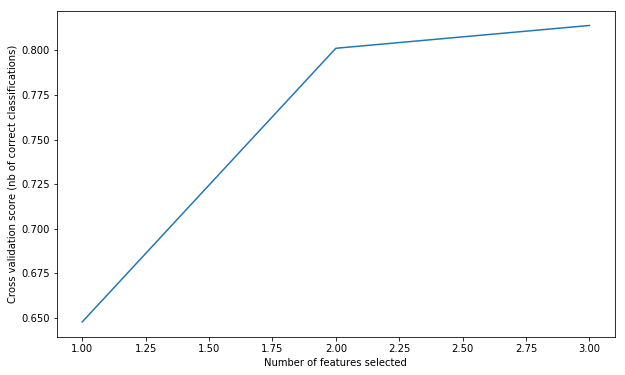

In [33]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [34]:
# Building a 10-fold cross-validation logistic regression

logreg = LogisticRegression()
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds

# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.814
LogisticRegression average log_loss is 0.423
LogisticRegression average auc is 0.889


## Delete outliers

In [35]:
def delete_outliers(dataset, column_list):
   
    for column in column_list:

        Q1 = dataset[column].quantile(.25)
        Q3 = dataset[column].quantile(.75)
        IQR = Q3 - Q1
        
        filter = (dataset[column] >= Q1 - 1.5 * IQR) & (dataset[column] <= Q3 + 1.5 *IQR)
        dataset = dataset.loc[filter]

    return dataset

In [36]:
dataset_no_outliers = delete_outliers(dataset, ["age", "purchase"])
dataset_no_outliers.shape

(4897, 4)

In [37]:
dataset_no_outliers.head()

,sex,age,purchase,output
0,1.0,20.0,1281.665114,1.0
1,0.0,43.0,1516.146235,0.0
2,0.0,24.0,1104.223856,1.0
3,0.0,52.0,1840.356286,1.0
4,1.0,10.0,1094.988464,1.0


In [38]:
# divide the set into a training and testing set - 75% and 25%
y = dataset_no_outliers["output"]
X = dataset_no_outliers[['age', 'purchase', 'sex']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Optimal number of features: 3
Selected features: ['age', 'purchase', 'sex']


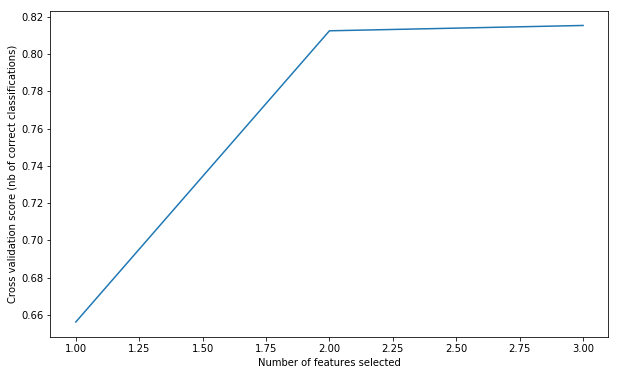

In [39]:
#Optimal number of features

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

##  Logistic regresion with Cross-validation

In [40]:
# Building a 10-fold cross-validation logistic regression

logreg = LogisticRegression()
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds

# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.815
LogisticRegression average log_loss is 0.412
LogisticRegression average auc is 0.887


Train/Test split results:
LogisticRegression accuracy is 0.802
LogisticRegression log_loss is 0.431
LogisticRegression auc is 0.873


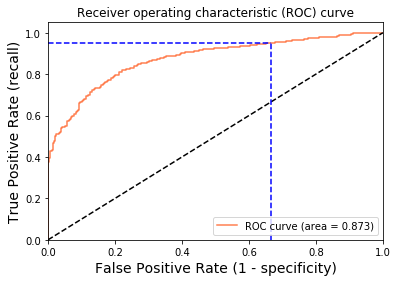

Using a threshold of 0.231 guarantees a sensitivity of 0.951 and a specificity of 0.335, i.e. a false positive rate of 66.51%.


In [41]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# SVM

In [63]:
SC = StandardScaler()
dataset_noout_scaled = pd.DataFrame(data = SC.fit_transform(dataset_no_outliers[['age', 'purchase', 'sex']]), columns = ["age" ,"purchase","sex"])

In [64]:
# divide the data
X_train, X_test, y_train, y_test = train_test_split(dataset_noout_scaled, dataset_no_outliers["output"], test_size=0.25, random_state=42)

In [65]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state= 123) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8089795918367347


In [67]:
#we are using a classifier with linear kernel

scores = cross_val_score(clf, dataset_noout_scaled[['age', 'purchase', 'sex']], dataset_no_outliers["output"], cv=10, scoring='accuracy') 
print(scores)

[0.84114053 0.80855397 0.83503055 0.80408163 0.81799591 0.80572597
 0.86298569 0.82617587 0.82208589 0.8200409 ]


In [68]:
scores.mean()

0.8243816908518434

## Choice of a parameter C

In [48]:
C_values=list(range(1,8))
accuracy_score=[]
for c in C_values:
    svc = svm.SVC(kernel='linear', C = c, random_state= 123)
    scores = cross_val_score(svc, dataset_noout_scaled, dataset_no_outliers["output"], cv=10, scoring='accuracy')
    accuracy_score.append(scores.mean())
print(accuracy_score)  

[0.8243816908518434, 0.8251988537721386, 0.8249951877843588, 0.8249951877843588, 0.8245870228190734, 0.8245870228190734, 0.8245870228190734]


Text(0,0.5,'Cross-Validated Accuracy')

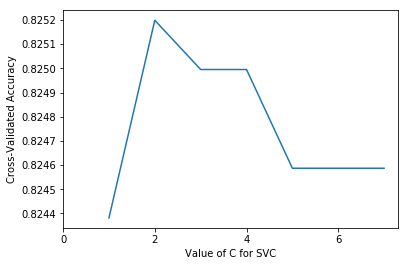

In [49]:
C_values=list(range(1,8))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,accuracy_score)
plt.xticks(np.arange(0,8,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

## Decision Trees

In [50]:
X = dataset[["age" ,"purchase","sex"]]  #independent columns
y = dataset["output"] 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
# Make a decision tree and train
tree = DecisionTreeClassifier(random_state= 123)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [53]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 199 nodes with maximum depth 17.


In [54]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 0.996


In [55]:
# Make probability predictions
train_probs = tree.predict_proba(X_train)[:, 1]
probs = tree.predict_proba(X_test)[:, 1]

train_predictions = tree.predict(X_train)
predictions = tree.predict(X_test)

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')


Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9814993524493638


Train/Test split results:
DecisionTreeClassifier accuracy is 0.984
DecisionTreeClassifier log_loss is 0.553
DecisionTreeClassifier auc is 0.981


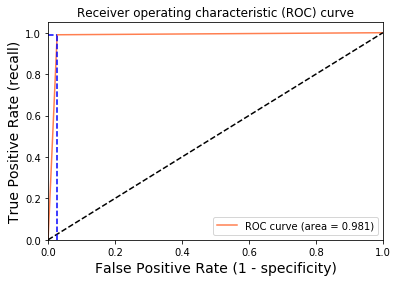

Using a threshold of 1.000 guarantees a sensitivity of 0.990 and a specificity of 0.973, i.e. a false positive rate of 2.71%.


In [62]:
[fpr, tpr, thr] = roc_curve(y_test, probs)
print('Train/Test split results:')
print(tree.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, predictions))
print(tree.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, probs))
print(tree.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Confusion matrix, without normalization
[[431  12]
 [  8 799]]


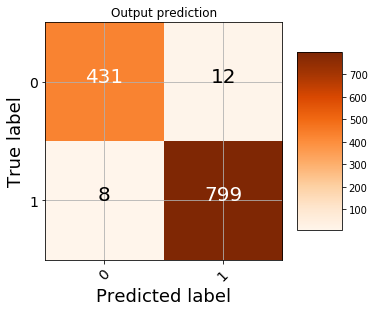

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 12)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)



cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'Output prediction')



In [60]:
from sklearn.metrics import accuracy_score

print("Testing set : "+ str(accuracy_score(y_test, predictions)))
print("Training set : "+ str(accuracy_score(y_train, train_predictions)))


#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Testing set : 0.984
Training set : 1.0


<div class="alert alert-block alert-info"><center><b>
CONCLUSION
</b></center></div>